<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_000_C8_1_%EA%B0%95%EC%B2%B4%EC%9D%98_%ED%9A%8C%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Problems
C 8.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [ ]:
from numpy import polyfit, poly1d

In [ ]:
rRstar = np.array([0., 0.01130, 0.02373, 0.03740, 0.05244, 0.06898, 0.08718, 0.10720, 0.12921, 0.15343, 0.18008, 0.20938, 0.24162, 0.27708, 0.31609, 0.35900, 0.40620, 0.45812, 0.51523, 0.57805, 0.64715, 0.72316, 0.80678, 0.89876, 1.00000])
Log_rrc = np.array([0.,-0.0007676, -0.0032979, -0.0081105, -0.0159332, -0.0275835, -0.0440001, -0.0666168, -0.0966376, -0.136117, -0.187302, -0.253082, -0.338876, -0.461671, -0.607536, -0.780852, -0.949463, -1.20746, -1.46811, -1.77071, -2.12543, -2.55734, -3.11969, -3.95562, -6.28531])

In [ ]:
Msol = 1.989e30 # Solar mass in [kg]
Rsol = 6.96e8 # solar radius in [m]
Mstar = 10 * Msol # stellar mass in units of solar mass
Rstar = 4 * Rsol #  stellar radius in units of solar mass

In [ ]:
rstar = rRstar * Rstar
rstar

array([0.00000000e+00, 3.14592000e+07, 6.60643200e+07, 1.04121600e+08,
       1.45992960e+08, 1.92040320e+08, 2.42709120e+08, 2.98444800e+08,
       3.59720640e+08, 4.27149120e+08, 5.01342720e+08, 5.82913920e+08,
       6.72670080e+08, 7.71390720e+08, 8.79994560e+08, 9.99456000e+08,
       1.13086080e+09, 1.27540608e+09, 1.43440032e+09, 1.60929120e+09,
       1.80166560e+09, 2.01327744e+09, 2.24607552e+09, 2.50214784e+09,
       2.78400000e+09])

In [ ]:
rrc = np.exp(Log_rrc*np.log(10.0))
rrc

array([1.00000000e+00, 9.98234097e-01, 9.92435064e-01, 9.81498183e-01,
       9.63977284e-01, 9.38461585e-01, 9.03649266e-01, 8.57794387e-01,
       8.00501961e-01, 7.30942139e-01, 6.49677760e-01, 5.58364759e-01,
       4.58272714e-01, 3.45405302e-01, 2.46867546e-01, 1.65633432e-01,
       1.12340667e-01, 6.20211765e-02, 3.40321981e-02, 1.69546957e-02,
       7.49152098e-03, 2.77114978e-03, 7.59119242e-04, 1.10759248e-04,
       5.18429851e-07])

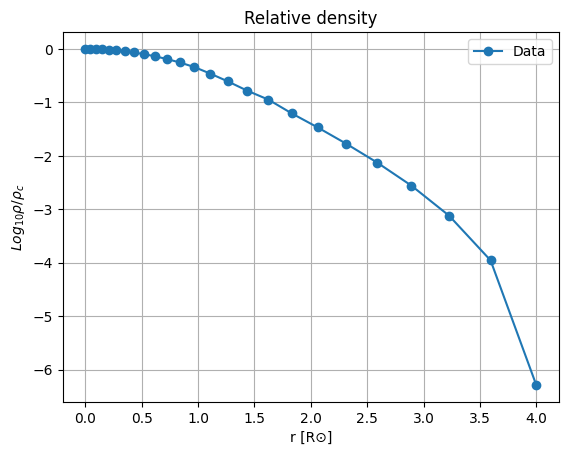

In [ ]:
#r = np.linspace(0,Rstar,100)

plt.grid()
plt.title("Relative density")
plt.xlabel("r [R⊙]")
plt.ylabel(r"$Log_{10} \rho/\rho_c$")

plt.plot(rstar/Rsol, Log_rrc, marker="o", label="Data")

plt.legend()

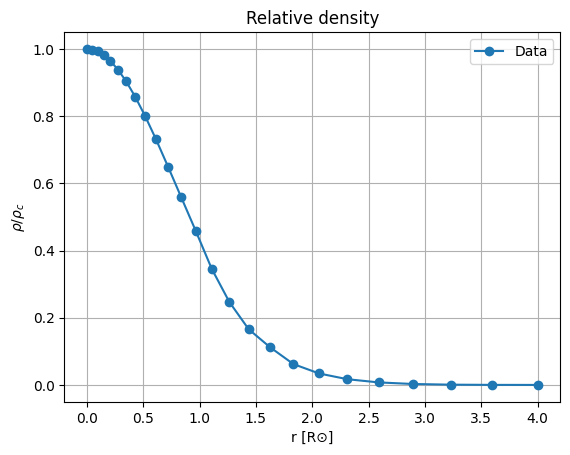

In [ ]:
#rhof = np.exp(np.log(10)*pfun(r))

plt.grid()
plt.title("Relative density")
plt.xlabel("r [R⊙]")
plt.ylabel(r"$\rho/\rho_c$")
#plt.plot(r/Rsol, rhof, c="blue", label="Polyfit")
plt.plot(rstar/Rsol, np.exp(np.log(10)*Log_rrc), marker="o", label="Data")
plt.legend()

## (a) 코어 밀도

반지름 $r$인 구의 표면적은 $4\pi r^2$이므로 두께 $dr$인 얇은 구껍질의 질량은

$$ dM = 4\pi{\rho} r^2 dr$$

인데,

$$ \begin{align}
M' = \int_0^{R_*} 4\pi\frac{\rho}{\rho_c} r^2 dr &= \frac{1}{\rho_c}\int_0^{R_*} 4\pi\rho r^2 dr = \frac{M_*}{\rho_c}
\end{align}$$

따라서

$$ \rho_c = \frac{M_*}{M'} $$

In [ ]:
# 질량 분포 dM/dr
dMidr = 4 * np.pi * rrc * rstar**2

In [ ]:
Mi = simpson(4 * np.pi * rrc * rstar**2, rstar)

# 코어 밀도:
rho_c = Mstar / Mi
rho_c

7852.935658309987

In [ ]:
# 실제 밀도 분포:
rho = rrc * rho_c
rho

array([7.85293566e+03, 7.83906813e+03, 7.79352870e+03, 7.70764208e+03,
       7.57005159e+03, 7.36967845e+03, 7.09629954e+03, 6.73620413e+03,
       6.28629039e+03, 5.74004159e+03, 5.10187765e+03, 4.38480252e+03,
       3.59878614e+03, 2.71244561e+03, 1.93863496e+03, 1.30070868e+03,
       8.82204034e+02, 4.87048308e+02, 2.67252662e+02, 1.33144135e+02,
       5.88304322e+01, 2.17616609e+01, 5.96131456e+00, 8.69785251e-01,
       4.07119626e-03])

In [ ]:
dMdr = dMidr * rho_c

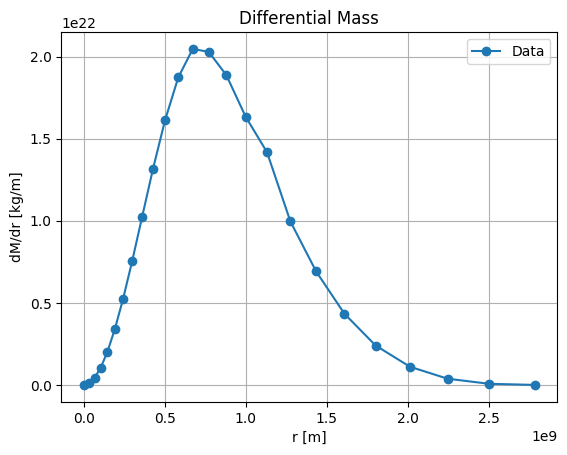

In [ ]:
"""
반지름에 따른 질량 분포
"""
plt.grid()
plt.xlabel("r [m]")
plt.ylabel("dM/dr [kg/m]")
plt.title("Differential Mass")
#plt.plot(r, dMdrpf*MM, c="blue", label="Polyfit")
plt.plot(rstar, dMdr, marker="o", label="Data")
plt.legend()

질량 $dM$, 반지름 $r$인 구껍질의 회전관성은

$$\begin{align} dI &= \frac{2}{3}dM r^2\\
&= \frac{8}{3}\pi\rho r^4 dr \end{align}$$

In [ ]:
dIdr = dMdr * (2/3) * rstar**2

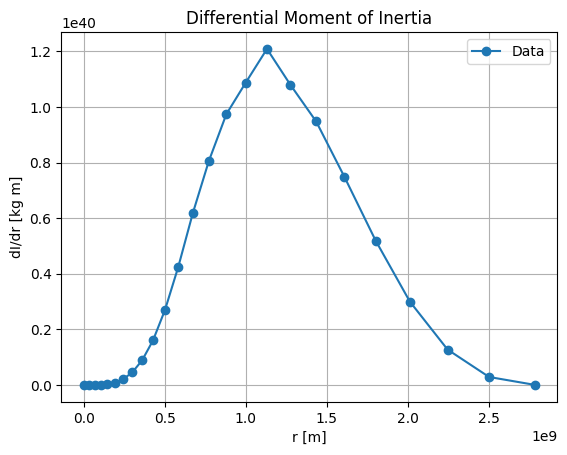

In [ ]:
plt.grid()
plt.xlabel("r [m]")
plt.ylabel("dI/dr [kg m]")
plt.title("Differential Moment of Inertia")
plt.plot(rstar, dIdr, marker="o", label="Data")
plt.legend()

* 누적 질량 분포

$$ \begin{align}M(r) &= \int_{0}^{r} dM \\
&=\int_{0}^{r} 4\pi\rho r^2 dr\end{align}$$

* 누적 관성모멘트 분포(구각)

$$ \begin{align}I(r) &= \int_{0}^{r} dI \\
&=\int_0^r \frac{2}{3} r^2 dM\\
&=\int_{0}^{r} \frac{8}{3}\pi\rho r^4 dr\end{align}$$

In [ ]:
"""
자료 값을 바탕으로 Simpson방법을 사용하여
누적 질량 분포 및 누적 회전관성 분포를 구한다
"""
idx = np.indices(rho.shape)[0]
Mcum = np.array([])
Icum = np.array([])
for k in idx:
  MSum = simpson(dMdr[:k+1], rstar[:k+1])
  ISum = simpson(dIdr[:k+1], rstar[:k+1])
  Mcum = np.append(Mcum, MSum)
  Icum = np.append(Icum, ISum)

In [ ]:
len(Mcum)

25

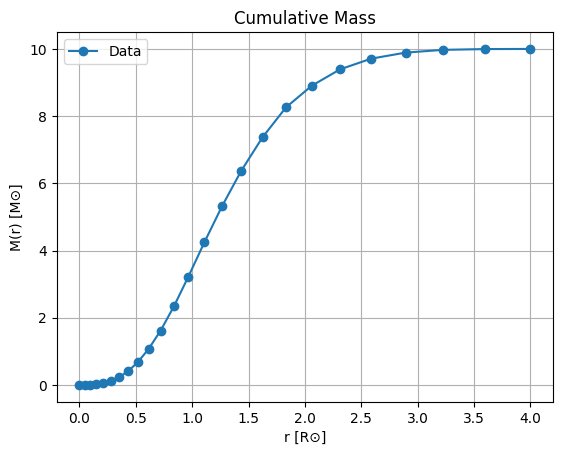

In [ ]:
plt.title("Cumulative Mass")
plt.grid()
plt.xlabel("r [R⊙]")
plt.ylabel("M(r) [M⊙]")
plt.plot(rstar/Rsol, Mcum/Msol, marker="o", label="Data")
plt.legend()

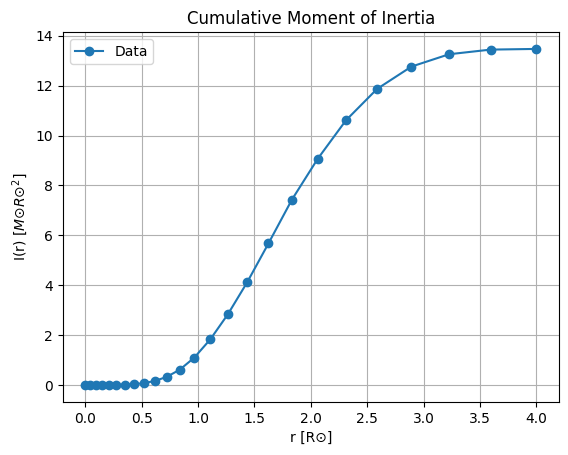

In [ ]:
plt.title("Cumulative Moment of Inertia")
plt.grid()
plt.xlabel("r [R⊙]")
plt.ylabel(r"I(r) [$M⊙ R⊙^2$]")
plt.plot(rstar/Rsol, Icum/(Msol*Rsol**2), marker="o", label="Data")
plt.legend()

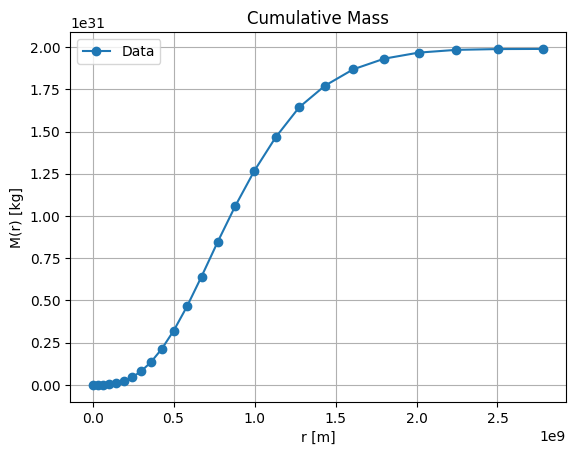

In [ ]:
plt.title("Cumulative Mass")
plt.grid()
plt.xlabel("r [m]")
plt.ylabel("M(r) [kg]")
plt.plot(rstar, Mcum, marker="o", label="Data")
plt.legend()

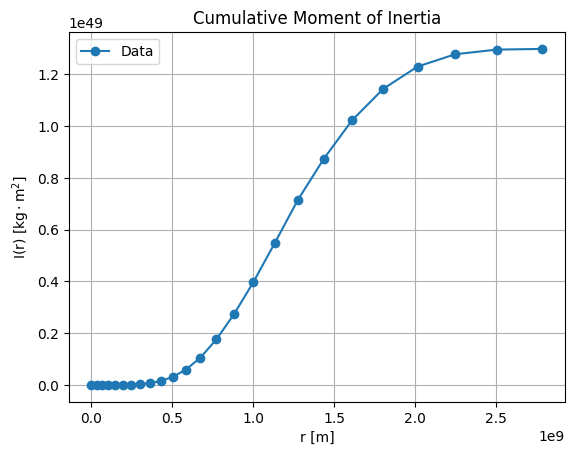

In [ ]:
plt.title("Cumulative Moment of Inertia")
plt.grid()
plt.xlabel("r [m]")
plt.ylabel(r"I(r) [$\rm kg \cdot m^2$]")
plt.plot(rstar, Icum, marker="o", label="Data")
plt.legend()

## (b) $R_3$

In [ ]:
from scipy.optimize import fsolve

그래프를 참고하여 누적 질량 분포가 $3M_⊙ \approx 6\times10^{30} \rm kg$인 부분 근처만을 내삽법으로 근사한 함수를 만들고, 함수 값이 $3M_⊙$인 해를 구하여 $R_3$의 근삿값으로 사용한다.

In [ ]:
rstar[5:15], Mcum[5:15]

(array([1.9204032e+08, 2.4270912e+08, 2.9844480e+08, 3.5972064e+08,
        4.2714912e+08, 5.0134272e+08, 5.8291392e+08, 6.7267008e+08,
        7.7139072e+08, 8.7999456e+08]),
 array([2.24172038e+29, 4.42635798e+29, 7.97852216e+29, 1.34174452e+30,
        2.13015394e+30, 3.21926981e+30, 4.64466128e+30, 6.41419811e+30,
        8.44345957e+30, 1.05714364e+31]))

In [ ]:
f0 = np.poly1d(np.polyfit(rstar[5:15], Mcum[5:15],9))

def f1(x):
  return f0(x) - 3 * Msol

In [ ]:
R3 = fsolve(f1, Rsol)[0]

In [ ]:
print(f"R3 = {R3:.3g} m = {R3/Rsol:.2f} R⊙")

R3 = 6.51e+08 m = 0.93 R⊙


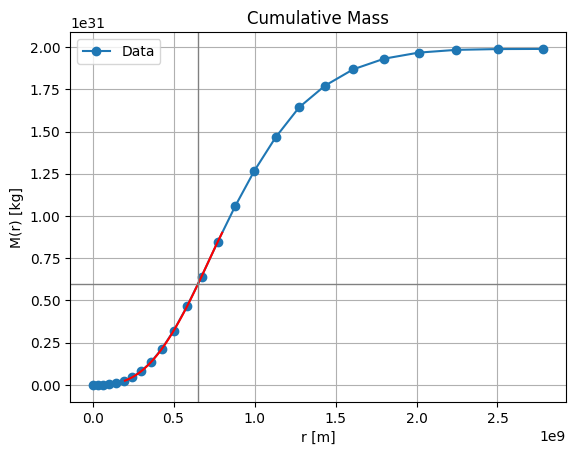

In [ ]:
rfit = np.linspace(2e8,8e8, 100)
Mfit = f0(rfit)

plt.title("Cumulative Mass")
plt.grid()
plt.xlabel("r [m]")
plt.ylabel("M(r) [kg]")
plt.plot(rstar, Mcum, marker="o", label="Data")

plt.plot(rfit, Mfit, c='r')
plt.axhline(3*Msol, c='gray', lw=1)
plt.axvline(R3, c='gray', lw=1)

plt.legend()

## (c) $3M_⊙$ 부분의 관성모멘트

In [ ]:
f2 = np.poly1d(np.polyfit(rstar[5:15], Icum[5:15], 9))

I3 = f2(R3)

In [ ]:
# 관성 모멘트 [kg m^2]
"""
비교를 위해 태양 크기와 질량의 균일한 구를 가정하면,

Isol = (2/5) * M⊙ * R⊙**2
"""

Isol = (2/5) * Msol * Rsol**2
print(f"I3 = {I3:.3g} kg m^2 = {I3/Isol:.2f} I⊙")

I3 = 9.25e+47 kg m^2 = 2.40 I⊙


## (d) $R_3$ 내부의 각운동량 ($L_3$)

In [ ]:
day = 24*60*60
omega = 2 * np.pi / (25 * day)
L3  = I3 * omega
print(f"L3 = {L3:.3g} kg/(m^2 s)")

L3 = 2.69e+42 kg/(m^2 s)


## (e) 초신성 폭발 이후
질량 $M$, 반지름 $R$인 균일한 구의 관성모멘트는

$$ \frac{2}{3}MR^2$$

이므로

In [ ]:
R_new = 1e4 # [m] 초시성 폭발 후 남은 구의 반지름
V_new = (4/3) * np.pi * R_new**3 # 남은 구의 부피
M3 = 3 * Msol
rho_new = M3 / V_new
I_new = (2/5) * M3 * R_new**2
omega_new = L3 / I_new
T_new = 2 * np.pi / omega_new

# new density
rho_new # [kg/m^3]

1.4245163181440092e+18

In [ ]:
# new period of ratation
T_new # [s]

0.0005576476819172508

In [ ]:
# frequency of rotation
f_new = 1 / T_new
f_new

1793.2469414414059